In [191]:
import pandas as pd
import json
import os
import re

In [192]:
pickle_files = [
    "./data/Sonnet-2.pkl",
    "./data/Sonnet-3.5-2.pkl",
    "./data/gpt-4o-2.pkl",
    "./data/gemini-1.5-pro-2.pkl",
]

dfs = [pd.read_pickle(file) for file in pickle_files]
df1 = pd.concat(dfs)

df1["prompt"] = "Which letter is being circled?"


pickle_files = [
    "./data/sonnet.pkl",
    "./data/Sonnet-3.5.pkl",
    "./data/gpt-4o.pkl",
    "./data/gemini-1.5-pro.pkl",
]

dfs = [pd.read_pickle(file) for file in pickle_files]
df2 = pd.concat(dfs)

df2["prompt"] = "Which character is being highlighted with a red oval?"

df = pd.concat([df1, df2])

In [193]:
# conver both gt and predicted to lower case
df["gt"] = df["gt"].apply(lambda x: x.lower())
df["predicted"] = df["predicted"].apply(lambda x: x.lower())
df["is_prediction_correct"] = df["gt"] == df["predicted"]

# Group by model and word, then calculate the accuracy
accuracy_per_model_and_word = df.groupby(["Model", "word"])[
    "is_prediction_correct"
].mean()

# Convert the accuracy to percentage and print the result
accuracy_per_model_and_word = accuracy_per_model_and_word * 100
# round 2 decimal places
accuracy_per_model_and_word = accuracy_per_model_and_word.round(2)

print(accuracy_per_model_and_word)

Model           word                
GPT-4o          Acknowledgement         69.03
                Subdermatoglyphic       63.60
                tHyUiKaRbNqWeOpXcZvM    77.92
Gemini-1.5-Pro  Acknowledgement         97.50
                Subdermatoglyphic       91.05
                tHyUiKaRbNqWeOpXcZvM    89.90
Sonnet          Acknowledgement         81.25
                Subdermatoglyphic       69.12
                tHyUiKaRbNqWeOpXcZvM    58.02
Sonnet-3.5      Acknowledgement         91.11
                Subdermatoglyphic       94.36
                tHyUiKaRbNqWeOpXcZvM    74.48
Name: is_prediction_correct, dtype: float64


In [194]:
# count per model and prompt
df.groupby(["Model", "prompt", "word"]).size()

Model           prompt                                                 word                
GPT-4o          Which character is being highlighted with a red oval?  Acknowledgement         360
                                                                       Subdermatoglyphic       408
                                                                       tHyUiKaRbNqWeOpXcZvM    480
                Which letter is being circled?                         Acknowledgement         360
                                                                       Subdermatoglyphic       408
                                                                       tHyUiKaRbNqWeOpXcZvM    480
Gemini-1.5-Pro  Which character is being highlighted with a red oval?  Acknowledgement         360
                                                                       Subdermatoglyphic       408
                                                                       tHyUiKaRbNqWeOpXcZvM    480
                W

In [195]:
# find missing GPT-4o images

df

,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
0,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,"The letter ""A"" in the word ""Acknowledgement"" i...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
1,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,50,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,"In the image, the letter ""A"" in the word ""Ackn...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
2,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,100,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
3,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,200,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,"In the given image, the letter ""A"" in the word...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
4,Acknowledgement,fonts/Helvetica.ttf,0,5,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,5,1.4,200,0,0,10,2,...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_42f...,The letter **M** is circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which character is being highlighted with a re...
1244,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,25,0,0,10,2,...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_141...,The letter **M** is being circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which character is being highlighted with a re...
1245,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,50,0,0,10,2,...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_8e3...,The letter **M** is being circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which character is being highlighted with a re...
1246,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,100,0,0,10,2,...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_944...,The letter **M** is being circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which character is being highlighted with a re...


In [196]:
display(accuracy_per_model_and_word.reset_index())

,Model,word,is_prediction_correct
0,GPT-4o,Acknowledgement,69.03
1,GPT-4o,Subdermatoglyphic,63.60
2,GPT-4o,tHyUiKaRbNqWeOpXcZvM,77.92
3,Gemini-1.5-Pro,Acknowledgement,97.50
4,Gemini-1.5-Pro,Subdermatoglyphic,91.05
5,Gemini-1.5-Pro,tHyUiKaRbNqWeOpXcZvM,89.90
6,Sonnet,Acknowledgement,81.25
7,Sonnet,Subdermatoglyphic,69.12
8,Sonnet,tHyUiKaRbNqWeOpXcZvM,58.02
9,Sonnet-3.5,Acknowledgement,91.11


In [197]:
# average over models
accuracy_per_model_and_word.groupby("Model").mean()

Model
GPT-4o            70.183333
Gemini-1.5-Pro    92.816667
Sonnet            69.463333
Sonnet-3.5        86.650000
Name: is_prediction_correct, dtype: float64

In [198]:
# pivot on word and have different columns for Model and is_prediction_correct
accuracy_per_model_and_word.reset_index().pivot(
    index="word", columns="Model", values="is_prediction_correct"
)

Model,GPT-4o,Gemini-1.5-Pro,Sonnet,Sonnet-3.5
word,,,,
Acknowledgement,69.03,97.50,81.25,91.11
Subdermatoglyphic,63.60,91.05,69.12,94.36
tHyUiKaRbNqWeOpXcZvM,77.92,89.90,58.02,74.48


In [199]:
# conver both gt and predicted to lower case
df["gt"] = df["gt"].apply(lambda x: x.lower())
df["predicted"] = df["predicted"].apply(lambda x: x.lower())
df["is_prediction_correct"] = df["gt"] == df["predicted"]

# Group by model, word, and prompt, then calculate the accuracy
accuracy_per_model_word_prompt = df.groupby(["Model", "word", "prompt"])[
    "is_prediction_correct"
].mean()

# Convert the accuracy to percentage and print the result
accuracy_per_model_word_prompt = accuracy_per_model_word_prompt * 100
# round 2 decimal places
accuracy_per_model_word_prompt = accuracy_per_model_word_prompt.round(2)

display(accuracy_per_model_word_prompt.reset_index())

,Model,word,prompt,is_prediction_correct
0,GPT-4o,Acknowledgement,Which character is being highlighted with a re...,68.89
1,GPT-4o,Acknowledgement,Which letter is being circled?,69.17
2,GPT-4o,Subdermatoglyphic,Which character is being highlighted with a re...,63.97
3,GPT-4o,Subdermatoglyphic,Which letter is being circled?,63.24
4,GPT-4o,tHyUiKaRbNqWeOpXcZvM,Which character is being highlighted with a re...,78.33
5,GPT-4o,tHyUiKaRbNqWeOpXcZvM,Which letter is being circled?,77.50
6,Gemini-1.5-Pro,Acknowledgement,Which character is being highlighted with a re...,98.33
7,Gemini-1.5-Pro,Acknowledgement,Which letter is being circled?,96.67
8,Gemini-1.5-Pro,Subdermatoglyphic,Which character is being highlighted with a re...,91.42
9,Gemini-1.5-Pro,Subdermatoglyphic,Which letter is being circled?,90.69


In [200]:
90.83
91.39
94.61
94.36
78.96
85.21

85.21

In [201]:
# calcualte accuracy per model on all words
accuracy_per_model = df.groupby("Model")["is_prediction_correct"].mean()
accuracy_per_model = accuracy_per_model * 100
accuracy_per_model = accuracy_per_model.round(2)
print(accuracy_per_model)

Model
GPT-4o            70.67
Gemini-1.5-Pro    92.47
Sonnet            68.35
Sonnet-3.5        85.78
Name: is_prediction_correct, dtype: float64


In [202]:
print(accuracy_per_model_and_word.to_latex())

\begin{tabular}{llr}
\toprule
 &  & is_prediction_correct \\
Model & word &  \\
\midrule
\multirow[t]{3}{*}{GPT-4o} & Acknowledgement & 69.030000 \\
 & Subdermatoglyphic & 63.600000 \\
 & tHyUiKaRbNqWeOpXcZvM & 77.920000 \\
\cline{1-3}
\multirow[t]{3}{*}{Gemini-1.5-Pro} & Acknowledgement & 97.500000 \\
 & Subdermatoglyphic & 91.050000 \\
 & tHyUiKaRbNqWeOpXcZvM & 89.900000 \\
\cline{1-3}
\multirow[t]{3}{*}{Sonnet} & Acknowledgement & 81.250000 \\
 & Subdermatoglyphic & 69.120000 \\
 & tHyUiKaRbNqWeOpXcZvM & 58.020000 \\
\cline{1-3}
\multirow[t]{3}{*}{Sonnet-3.5} & Acknowledgement & 91.110000 \\
 & Subdermatoglyphic & 94.360000 \\
 & tHyUiKaRbNqWeOpXcZvM & 74.480000 \\
\cline{1-3}
\bottomrule
\end{tabular}



In [203]:
# get average per model
accuracy_per_model_and_word.groupby("Model").mean()

Model
GPT-4o            70.183333
Gemini-1.5-Pro    92.816667
Sonnet            69.463333
Sonnet-3.5        86.650000
Name: is_prediction_correct, dtype: float64

In [204]:
# Assuming 'df' has a column named 'font' that contains the font information for each entry.

# Group by model, word, and font, then calculate the accuracy
accuracy_per_model_word_font = df.groupby(["Model", "word", "font_path"])[
    "is_prediction_correct"
].mean()

# Convert the accuracy to percentage and round to 2 decimal places
accuracy_per_model_word_font = (accuracy_per_model_word_font * 100).round(2)

accuracy_per_model_word_font

Model           word                  font_path                                
GPT-4o          Acknowledgement       fonts/Helvetica.ttf                          69.44
                                      fonts/OpenSans-VariableFont_wdth,wght.ttf    68.61
                Subdermatoglyphic     fonts/Helvetica.ttf                          66.42
                                      fonts/OpenSans-VariableFont_wdth,wght.ttf    60.78
                tHyUiKaRbNqWeOpXcZvM  fonts/Helvetica.ttf                          81.04
                                      fonts/OpenSans-VariableFont_wdth,wght.ttf    74.79
Gemini-1.5-Pro  Acknowledgement       fonts/Helvetica.ttf                          96.67
                                      fonts/OpenSans-VariableFont_wdth,wght.ttf    98.33
                Subdermatoglyphic     fonts/Helvetica.ttf                          90.44
                                      fonts/OpenSans-VariableFont_wdth,wght.ttf    91.67
                tHyUiKaRbNqWeO

In [205]:
accuracy_per_model_word_prompt.reset_index()

,Model,word,prompt,is_prediction_correct
0,GPT-4o,Acknowledgement,Which character is being highlighted with a re...,68.89
1,GPT-4o,Acknowledgement,Which letter is being circled?,69.17
2,GPT-4o,Subdermatoglyphic,Which character is being highlighted with a re...,63.97
3,GPT-4o,Subdermatoglyphic,Which letter is being circled?,63.24
4,GPT-4o,tHyUiKaRbNqWeOpXcZvM,Which character is being highlighted with a re...,78.33
5,GPT-4o,tHyUiKaRbNqWeOpXcZvM,Which letter is being circled?,77.50
6,Gemini-1.5-Pro,Acknowledgement,Which character is being highlighted with a re...,98.33
7,Gemini-1.5-Pro,Acknowledgement,Which letter is being circled?,96.67
8,Gemini-1.5-Pro,Subdermatoglyphic,Which character is being highlighted with a re...,91.42
9,Gemini-1.5-Pro,Subdermatoglyphic,Which letter is being circled?,90.69


In [206]:
prompt_labels = {
    "Which character is being highlighted with a red oval?": "Prompt 2",
    "Which letter is being circled?": "Prompt 1",
}

# Calculate accuracy and reshape DataFrame
accuracy_per_model_prompt_thickness = df.groupby(["Model", "prompt", "word"])[
    "is_prediction_correct"
].mean()
accuracy_per_model_prompt_thickness = (accuracy_per_model_prompt_thickness * 100).round(
    2
)

# Create a pivot table with models as columns, and line thickness as rows
pivot_df = accuracy_per_model_prompt_thickness.reset_index()
pivot_df["prompt"] = pivot_df["prompt"].map(
    prompt_labels
)  # Map full prompt text to simplified labels
pivot_table = pivot_df.pivot_table(
    index="word", columns=["Model", "prompt"], values="is_prediction_correct"
)

# Display the pivot table
pivot_table

Model                  GPT-4o          Gemini-1.5-Pro            Sonnet  \
prompt               Prompt 1 Prompt 2       Prompt 1 Prompt 2 Prompt 1   
word                                                                      
Acknowledgement         69.17    68.89          96.67    98.33    82.50   
Subdermatoglyphic       63.24    63.97          90.69    91.42    71.32   
tHyUiKaRbNqWeOpXcZvM    77.50    78.33          86.88    92.92    65.83   

Model                         Sonnet-3.5           
prompt               Prompt 2   Prompt 1 Prompt 2  
word                                               
Acknowledgement         80.00      91.39    90.83  
Subdermatoglyphic       66.91      94.36    94.36  
tHyUiKaRbNqWeOpXcZvM    50.21      85.21    63.75

In [207]:
print(pivot_table.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
Model & \multicolumn{2}{r}{GPT-4o} & \multicolumn{2}{r}{Gemini-1.5-Pro} & \multicolumn{2}{r}{Sonnet} & \multicolumn{2}{r}{Sonnet-3.5} \\
prompt & Prompt 1 & Prompt 2 & Prompt 1 & Prompt 2 & Prompt 1 & Prompt 2 & Prompt 1 & Prompt 2 \\
word &  &  &  &  &  &  &  &  \\
\midrule
Acknowledgement & 69.170000 & 68.890000 & 96.670000 & 98.330000 & 82.500000 & 80.000000 & 91.390000 & 90.830000 \\
Subdermatoglyphic & 63.240000 & 63.970000 & 90.690000 & 91.420000 & 71.320000 & 66.910000 & 94.360000 & 94.360000 \\
tHyUiKaRbNqWeOpXcZvM & 77.500000 & 78.330000 & 86.880000 & 92.920000 & 65.830000 & 50.210000 & 85.210000 & 63.750000 \\
\bottomrule
\end{tabular}



# Qualitative Samples

In [208]:
df.columns

Index(['word', 'font_path', 'circle_index', 'thickness', 'scale_factor',
       'padding', 'x_offset', 'y_offset', 'canvas_width', 'canvas_height',
       'final_width', 'final_height', 'image_path', 'model-output-file',
       'model-output-raw', 'predicted', 'gt', 'is_prediction_correct',
       'word_label', 'Model', 'fnames', 'fname', 'prompt'],
      dtype='object')

Model: Sonnet


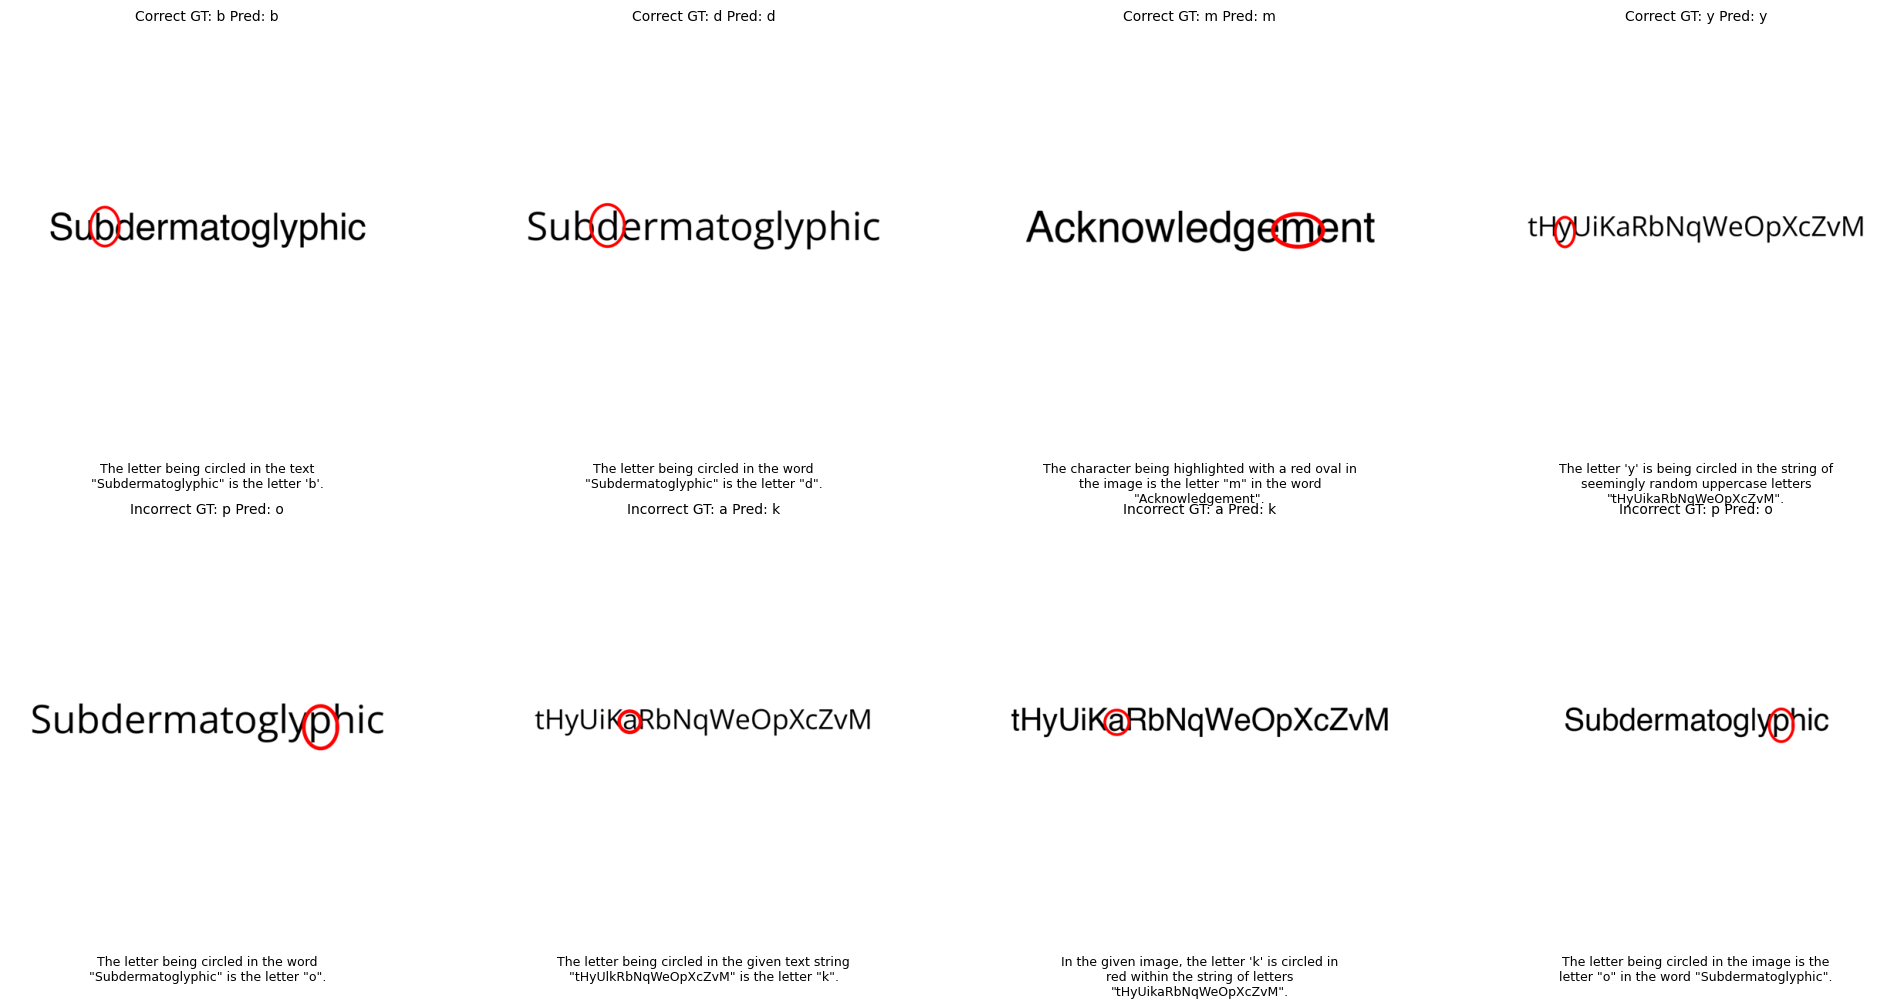

Model: Sonnet-3.5


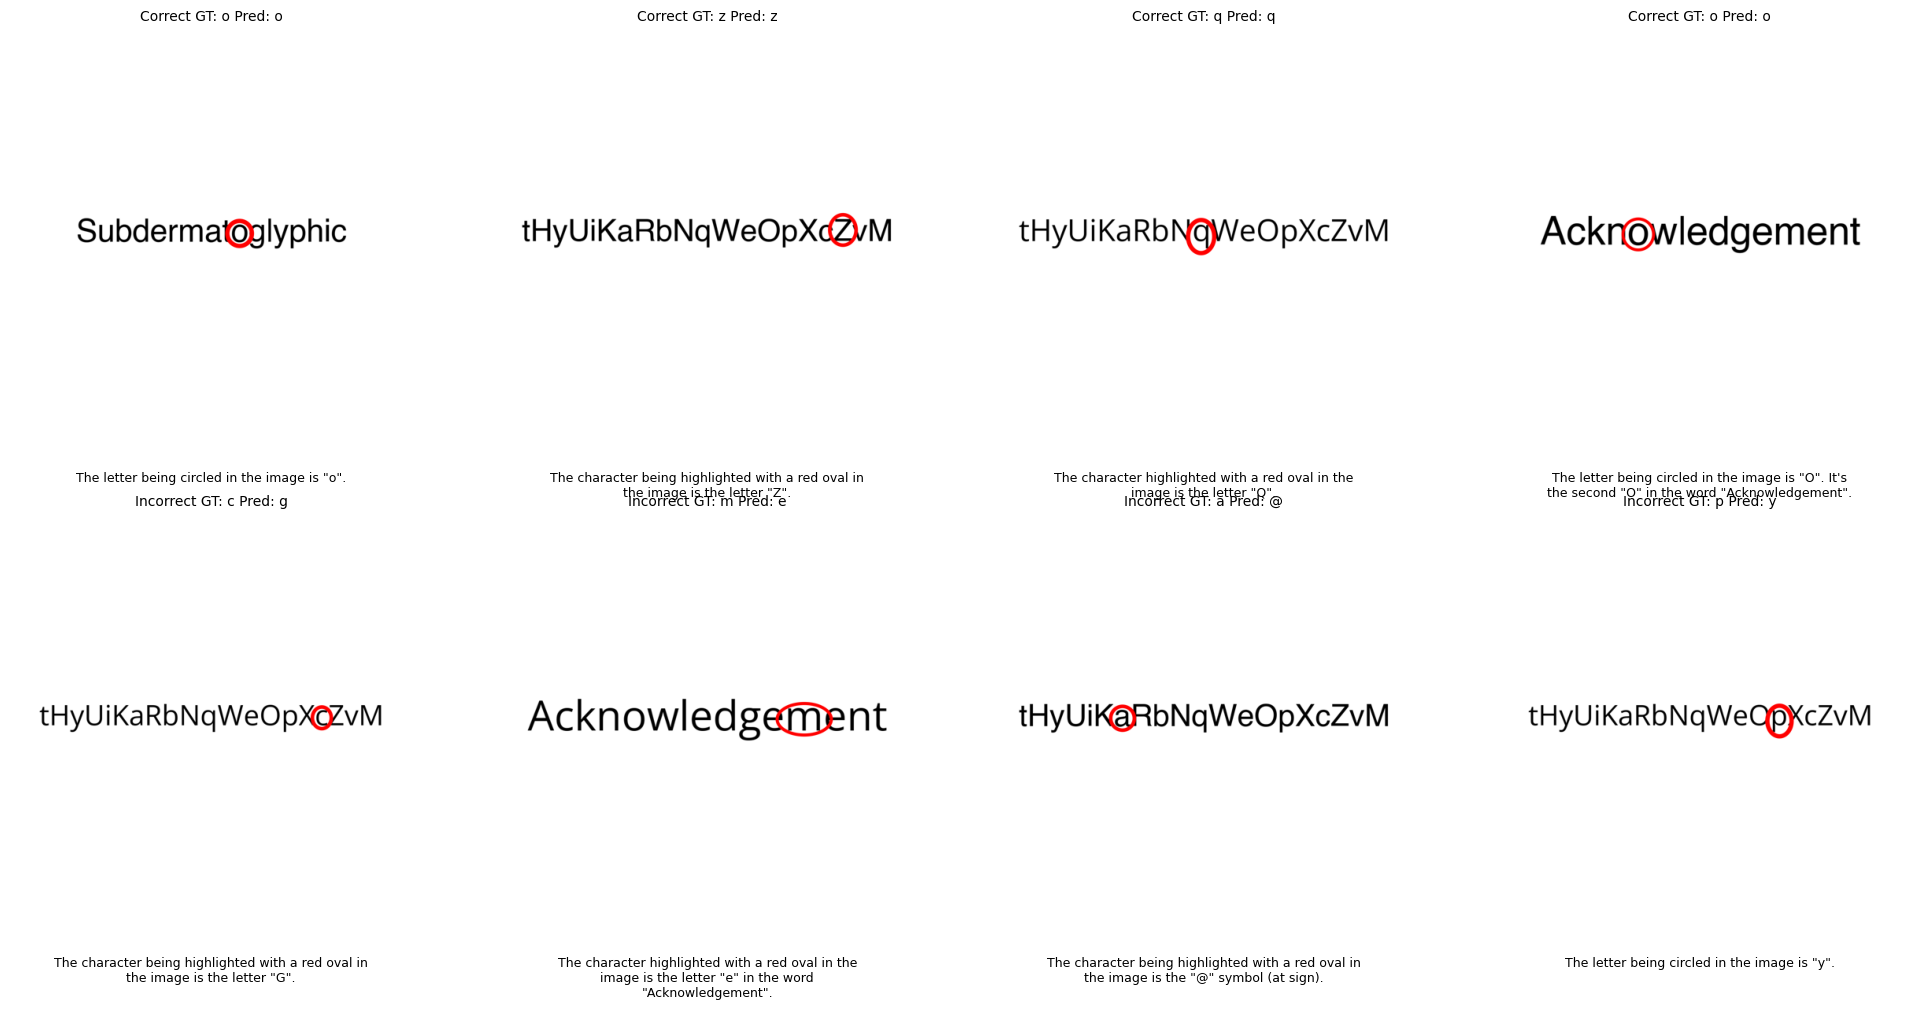

Model: GPT-4o


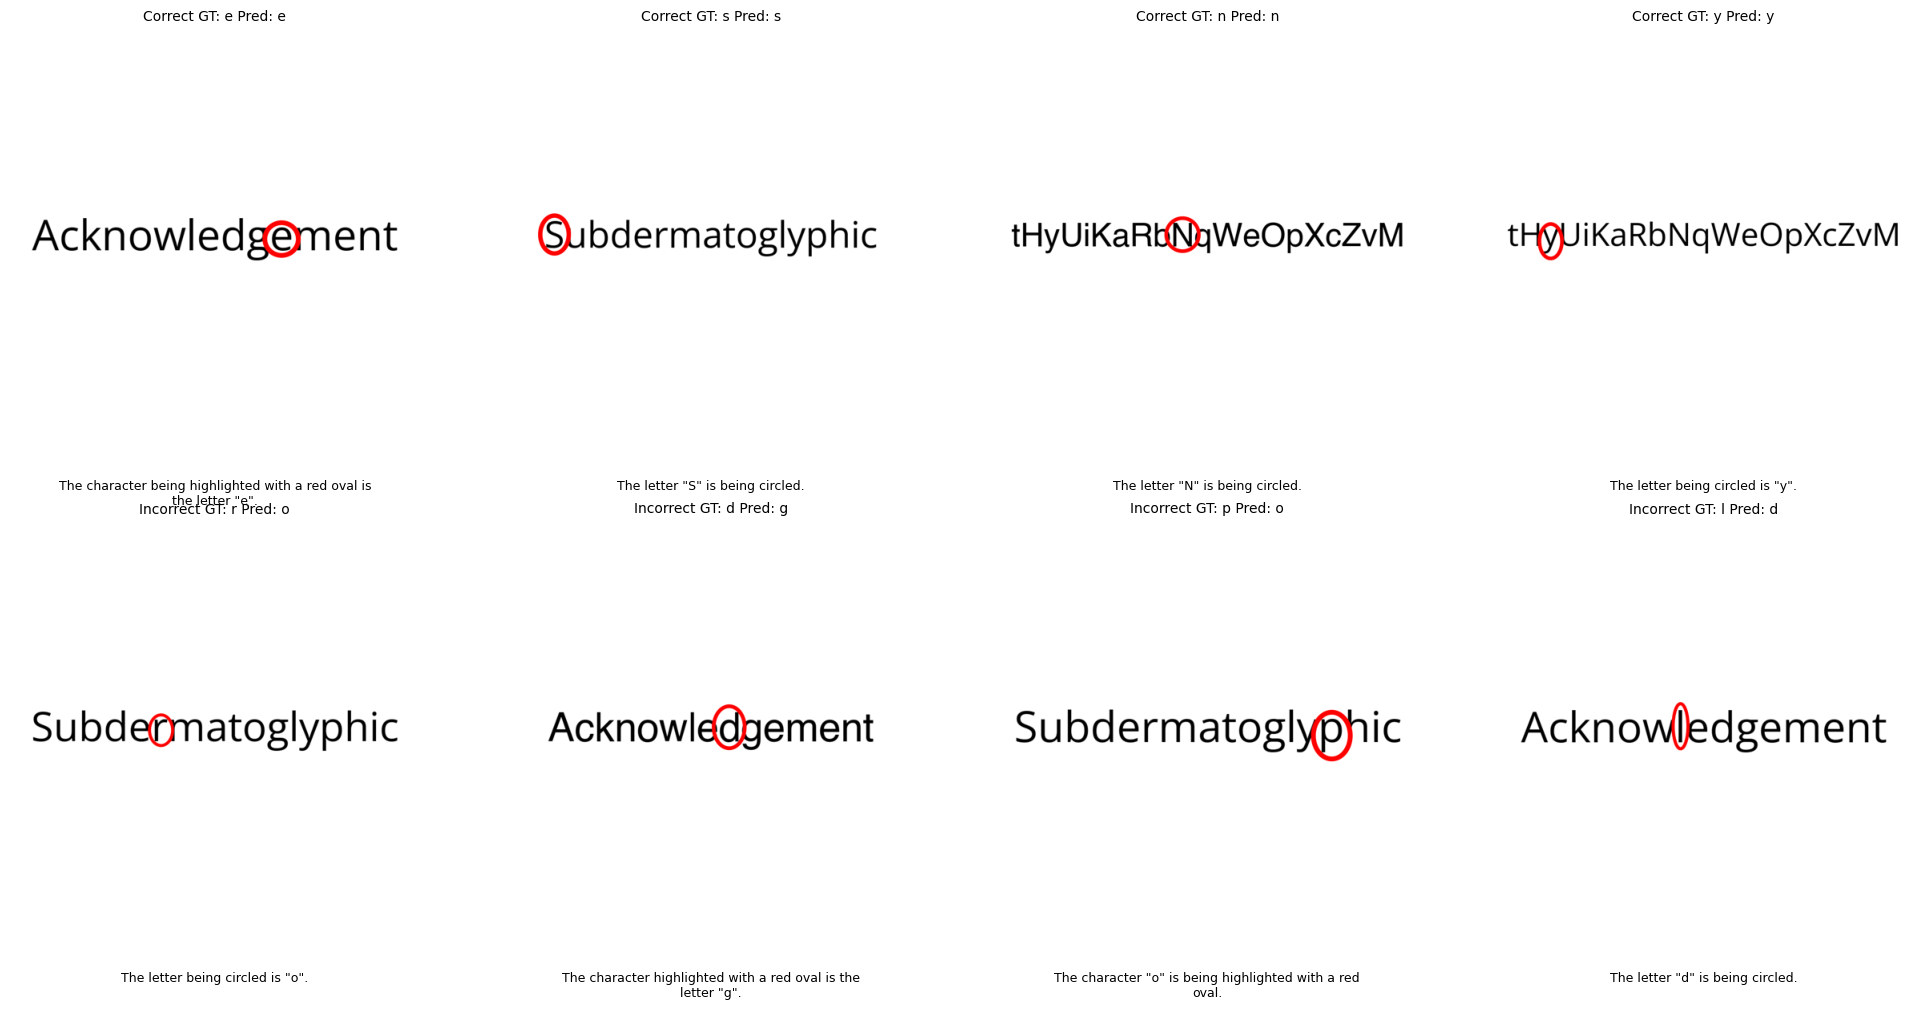

Model: Gemini-1.5-Pro


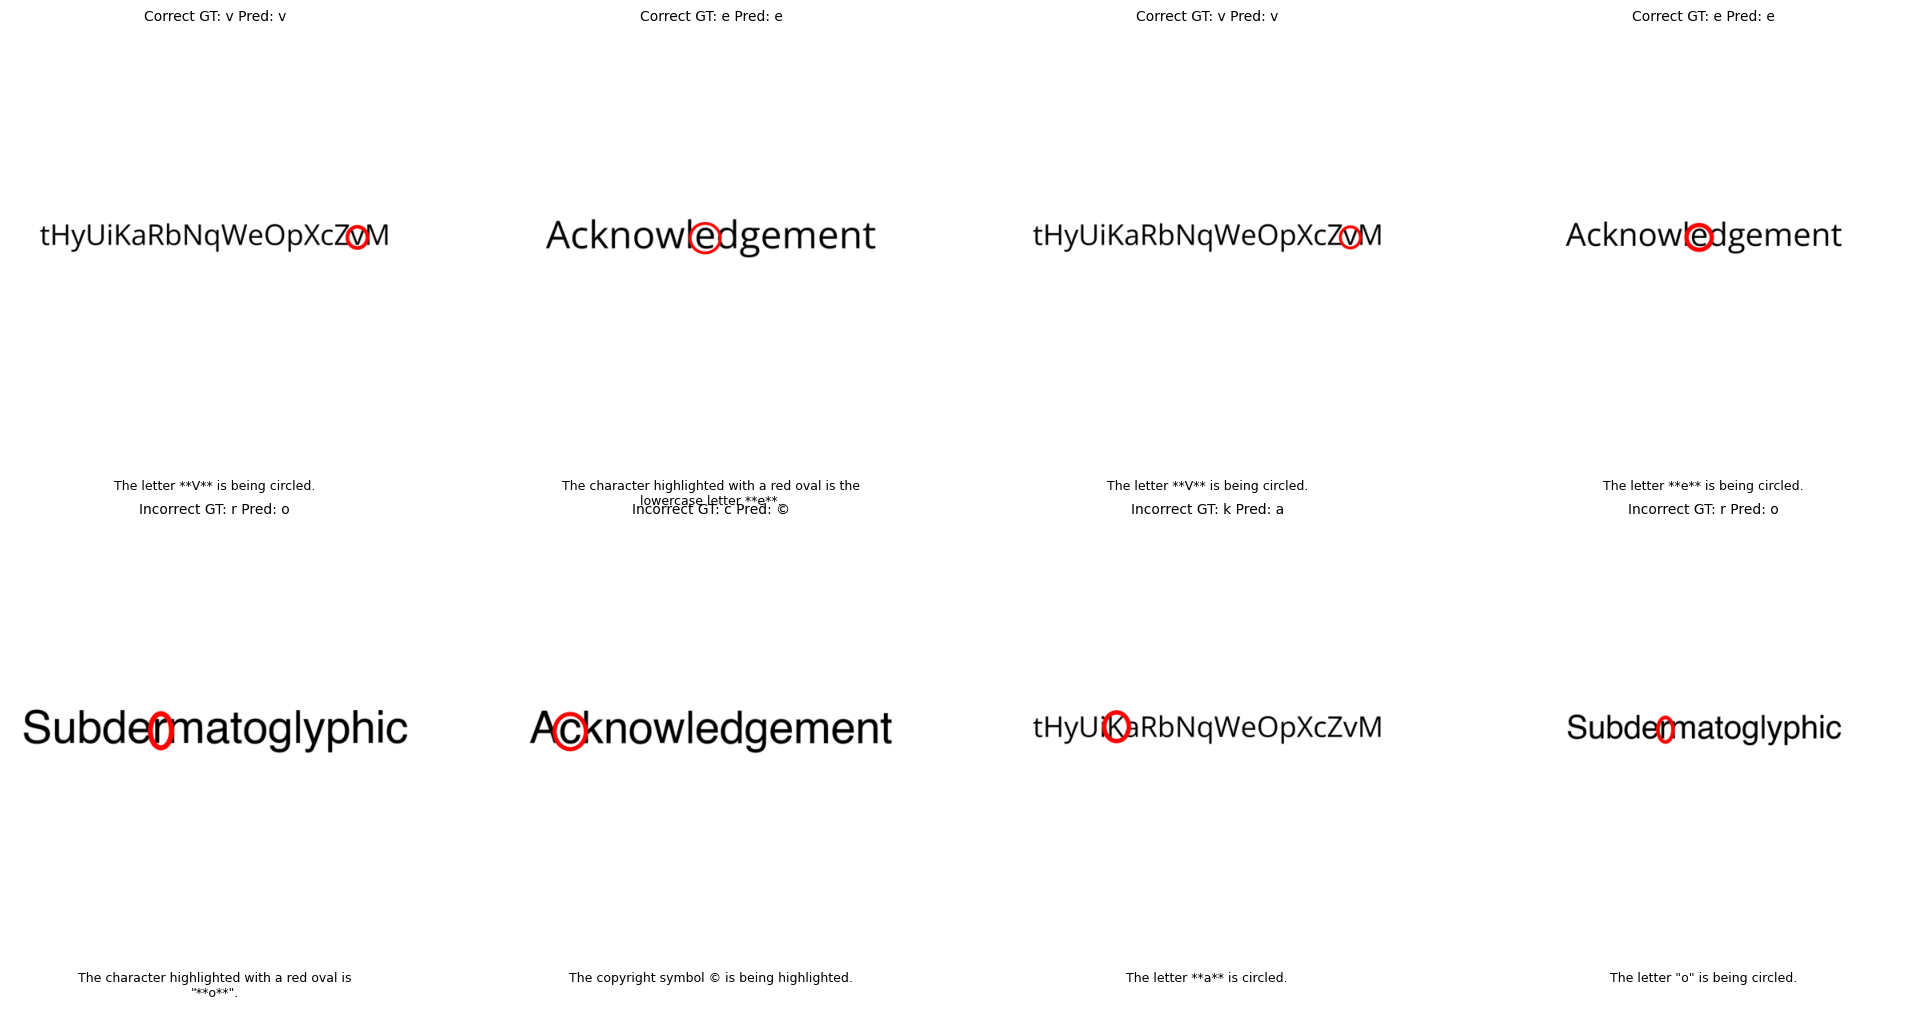

In [209]:
import matplotlib.pyplot as plt
from PIL import Image
import textwrap


# Function to display samples of correct and incorrect predictions for each model
def display_model_outputs_with_images(df):
    models = df["Model"].unique()
    for model in models:
        print(f"Model: {model}")
        correct_predictions = df[
            (df["Model"] == model) & (df["is_prediction_correct"] == True)
        ]
        incorrect_predictions = df[
            (df["Model"] == model) & (df["is_prediction_correct"] == False)
        ]

        # Sample 4 correct and 4 incorrect predictions
        sample_correct = correct_predictions.sample(4, random_state=11231)
        sample_incorrect = incorrect_predictions.sample(4, random_state=11231)

        # Combine samples for display
        samples = pd.concat([sample_correct, sample_incorrect])

        # Setup plot
        _, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
        axs = axs.flatten()  # Flatten to 1D array for easier indexing

        for idx, (ax, (_, row)) in enumerate(zip(axs, samples.iterrows())):
            img_path = f"./{row['image_path']}"
            image = Image.open(img_path)
            ax.imshow(image)
            ax.axis("off")  # Turn off axis
            # add gt to the title

            ax.set_title(
                f"{'Correct' if row['is_prediction_correct'] else 'Incorrect'}"
                + f" GT: {row['gt']}"
                + f" Pred: {row['predicted']}",
                fontsize=10,
            )

            # Wrap text to fit under the image
            wrapped_text = textwrap.fill(row["model-output-raw"], width=50)
            ax.text(
                0.5,
                -0.1,
                wrapped_text,
                fontsize=9,
                ha="center",
                va="top",
                transform=ax.transAxes,
            )

        plt.tight_layout()
        plt.show()


# Call the function
display_model_outputs_with_images(df)

# Samples for the paper

In [170]:
df_prompt1 = df[df["prompt"] == "Which character is being highlighted with a red oval?"]
df_prompt2 = df[df["prompt"] == "Which letter is being circled?"]
display(df_prompt1)
display(df_prompt2)

,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
0,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,25,0,0,10,2,...,./images/Acknowledgement/text_image_2445b2a9-9...,"The letter ""A"" is being circled in the word ""A...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which character is being highlighted with a re...
1,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,50,0,0,10,2,...,./images/Acknowledgement/text_image_3bac479b-3...,The letter being circled in the image is 'A' w...,a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which character is being highlighted with a re...
2,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,100,0,0,10,2,...,./images/Acknowledgement/text_image_7ddbe27c-5...,"The letter being circled in the word ""Acknowle...",t,a,False,Acknowledgement,Sonnet,NaN,NaN,Which character is being highlighted with a re...
3,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,200,0,0,10,2,...,./images/Acknowledgement/text_image_f22668e3-c...,"The letter 'A' is being circled in the word ""A...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which character is being highlighted with a re...
4,Acknowledgement,fonts/Helvetica.ttf,0,5,1.4,25,0,0,10,2,...,./images/Acknowledgement/text_image_4181a30f-3...,"The letter being circled in the word ""Acknowle...",t,a,False,Acknowledgement,Sonnet,NaN,NaN,Which character is being highlighted with a re...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,5,1.4,200,0,0,10,2,...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_42f...,The letter **M** is circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which character is being highlighted with a re...
1244,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,25,0,0,10,2,...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_141...,The letter **M** is being circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which character is being highlighted with a re...
1245,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,50,0,0,10,2,...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_8e3...,The letter **M** is being circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which character is being highlighted with a re...
1246,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,100,0,0,10,2,...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_944...,The letter **M** is being circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which character is being highlighted with a re...


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
0,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,"The letter ""A"" in the word ""Acknowledgement"" i...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
1,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,50,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,"In the image, the letter ""A"" in the word ""Ackn...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
2,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,100,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
3,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,200,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,"In the given image, the letter ""A"" in the word...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
4,Acknowledgement,fonts/Helvetica.ttf,0,5,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,5,1.4,200,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is t...,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which letter is being circled?
1244,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,25,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted in the red oval is *...,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which letter is being circled?
1245,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,50,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,"The character highlighted with a red oval is ""...",m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which letter is being circled?
1246,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,100,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,"The character highlighted with a red oval is ""...",m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which letter is being circled?


In [171]:
import os
import pandas as pd
from PIL import Image
import shutil

# predicted	gt


# Function to find and save entries where at least two models failed
def save_failed_model_outputs(df, prompt_id):
    # Group by 'image_name' and filter where at least two 'is_prediction_correct' values are False
    # rename image_second_prompt to image in imahe_path
    df["image_path"] = df["image_path"].apply(
        lambda x: x.replace("image_second_prompt", "image")
    )
    failed_df = df.groupby("image_path").filter(
        lambda x: x["is_prediction_correct"].value_counts().get(False, 0) >= 2
    )
    print(f"Size of failed_df: {len(failed_df)}")
    # print unique model anmes
    print(f"Unique model names: {failed_df['Model'].unique()}")
    # Check if there are any entries where at least two models failed
    if not failed_df.empty:
        print("Entries where at least three models failed:")
        # display(failed_df)  # Displaying the DataFrame for review

        # group by image_name and show is_prediction_correct value for each model in a separate column (column names should be model names)
        pivoted_df = failed_df.pivot_table(
            index="image_path",
            columns="Model",
            values="is_prediction_correct",
            aggfunc="first",
        )

        # add a gpt-4o column with results of gpt-4o from the original df for each row
        # ADD CODE HERE
        # pivoted_df["GPT-4o"] = df[df["Model"] == "GPT-4o"].set_index("image_path")[
        #     "is_prediction_correct"
        # ]

        # Display the pivoted DataFrame
        # display(pivoted_df)
        # print unique models
        print(f"Unique model names: {pivoted_df.columns} in pivoted_df")

        # Create a directory for saving the images
        base_dir = "./qualitative"
        if not os.path.exists(base_dir):
            os.makedirs(base_dir)

        # Save images with new naming convention
        for image_name, group in failed_df.groupby("image_path"):
            details = [f"gt_{group.iloc[0]['gt']}"]  # Start with ground truth label

            for _, row in group.iterrows():
                details.append(f"{row['Model']}_{row['predicted']}")

            image_name_short = os.path.basename(image_name).replace(".png", "")

            detailed_filename = (
                "_".join(details)
                + "_"
                + image_name_short
                + "_prompt"
                + prompt_id
                + ".png"
            )
            img_path = f"{image_name}"
            new_filename = detailed_filename

            shutil.copy(img_path, os.path.join(base_dir, new_filename))

    else:
        print("No entries found where at least two models failed.")

In [172]:
df_prompt2["image_path"] = df_prompt2["image_path"].apply(
    lambda x: x.replace("images_second_prompt", "images")
)
df_prompt2["image_path"] = df_prompt2["image_path"].apply(
    lambda x: x.replace("images_second_prompt", "images")
)

/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_79530/1315131917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prompt2["image_path"] = df_prompt2["image_path"].apply(
/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_79530/1315131917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prompt2["image_path"] = df_prompt2["image_path"].apply(


In [173]:
df_prompt2

,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
0,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,"The letter ""A"" in the word ""Acknowledgement"" i...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
1,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,50,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,"In the image, the letter ""A"" in the word ""Ackn...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
2,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,100,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
3,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,200,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,"In the given image, the letter ""A"" in the word...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
4,Acknowledgement,fonts/Helvetica.ttf,0,5,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,5,1.4,200,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is t...,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which letter is being circled?
1244,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,25,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted in the red oval is *...,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which letter is being circled?
1245,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,50,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,"The character highlighted with a red oval is ""...",m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which letter is being circled?
1246,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,100,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,"The character highlighted with a red oval is ""...",m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which letter is being circled?


In [174]:
save_failed_model_outputs(df_prompt2, "2")

/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_79530/2524570500.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["image_path"] = df["image_path"].apply(


Size of failed_df: 1008
Unique model names: ['Sonnet' 'Sonnet-3.5' 'GPT-4o' 'Gemini-1.5-Pro']
Entries where at least three models failed:
Unique model names: Index(['GPT-4o', 'Gemini-1.5-Pro', 'Sonnet', 'Sonnet-3.5'], dtype='object', name='Model') in pivoted_df


In [119]:
# Call the function
save_failed_model_outputs(df_prompt1, "1")

Size of failed_df: 268
Unique model names: ['Sonnet' 'Sonnet-3.5' 'GPT-4o' 'Gemini-1.5-Pro']
Entries where at least three models failed:
Unique model names: Index(['GPT-4o', 'Gemini-1.5-Pro', 'Sonnet', 'Sonnet-3.5'], dtype='object', name='Model') in pivoted_df


In [121]:
df_prompt2.Model.unique()

array(['Sonnet', 'Sonnet-3.5', 'GPT-4o', 'Gemini-1.5-Pro'], dtype=object)

In [122]:
df_prompt2[df_prompt2["Model"] == "GPT-4o"]["is_prediction_correct"].mean()

0.7043269230769231

In [148]:
import os
import pandas as pd
from PIL import Image
import shutil

# predicted	gt


# Function to find and save entries where at least two models failed
def save_failed_model_outputs(df, prompt_id):
    # Group by 'image_name' and filter where at least two 'is_prediction_correct' values are False
    df["fname"] = df["image_path"].apply(lambda x: os.path.basename(x))

    failed_df = df.groupby("fname").filter(
        lambda x: x["is_prediction_correct"].value_counts().get(False, 0) >= 3
    )

    # candidate image_path
    candidate_image_path = failed_df["fname"].unique()

    # now filder df based on candidate_image_path
    failed_df = df[df["fname"].isin(candidate_image_path)]

    print(f"Size of failed_df: {len(failed_df)}")
    # print unique model anmes
    print(f"Unique model names: {failed_df['Model'].unique()}")
    # Check if there are any entries where at least two models failed
    if not failed_df.empty:
        print("Entries where at least three models failed:")
        # display(failed_df)  # Displaying the DataFrame for review

        # group by image_name and show is_prediction_correct value for each model in a separate column (column names should be model names)
        pivoted_df = failed_df.pivot_table(
            index="fname",
            columns="Model",
            values="is_prediction_correct",
            aggfunc="first",
        )

        print(f"Unique model names: {pivoted_df.columns} in pivoted_df")

        # Create a directory for saving the images
        base_dir = "./qualitative"
        if not os.path.exists(base_dir):
            os.makedirs(base_dir)

        # Save images with new naming convention
        for image_name, group in failed_df.groupby("fname"):
            display(group)
            details = [f"gt_{group.iloc[0]['gt']}"]  # Start with ground truth label
            # only save if we have all 4 models data for that row ['Sonnet' 'Sonnet-3.5' 'GPT-4o' 'Gemini-1.5-Pro']
            if set(group["Model"].unique().tolist()) == set(
                [
                    "Sonnet",
                    "Sonnet-3.5",
                    "GPT-4o",
                    "Gemini-1.5-Pro",
                ]
            ):
                for _, row in group.iterrows():
                    details.append(f"{row['Model']}_{row['predicted']}")

                image_name_short = os.path.basename(image_name).replace(".png", "")
                # get image_path from df
                full_image_path = group.iloc[0]["image_path"]

                detailed_filename = (
                    "_".join(details)
                    + "_"
                    + image_name_short
                    + "_prompt"
                    + prompt_id
                    + ".png"
                )
                img_path = f"./{full_image_path}"
                new_filename = detailed_filename

                shutil.copy(img_path, os.path.join(base_dir, new_filename))
            else:
                print(
                    f"Skipping {image_name} because it has only {group['Model'].unique().tolist()}"
                )

    else:
        print("No entries found where at least two models failed.")

In [149]:
save_failed_model_outputs(df_prompt2, "2")

Size of failed_df: 180
Unique model names: ['Sonnet' 'Sonnet-3.5' 'GPT-4o' 'Gemini-1.5-Pro']
Entries where at least three models failed:
Unique model names: Index(['GPT-4o', 'Gemini-1.5-Pro', 'Sonnet', 'Sonnet-3.5'], dtype='object', name='Model') in pivoted_df


/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_79530/52208463.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fname"] = df["image_path"].apply(lambda x: os.path.basename(x))


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
779,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,0,6,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,There is no character highlighted with a red o...,none,t,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_022fd3f7-25aa-4df8-99b5-9c13d30ff05...,Which letter is being circled?
779,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,0,6,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,i,t,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_022fd3f7-25aa-4df8-99b5-9c13d30ff05...,Which letter is being circled?
779,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,0,6,1.4,200,0,0,10,2,...,NaN,The character being highlighted with a red ova...,i,t,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_022fd3f7-25aa-4df8-99b5-9c13d30ff05...,text_image_022fd3f7-25aa-4df8-99b5-9c13d30ff05...,Which letter is being circled?
779,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,0,6,1.4,200,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,t,t,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_022fd3f7-25aa-4df8-99b5-9c13d30ff05...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1207,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character highlighted with a red oval in t...,z,c,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_03b84839-87b8-410f-85ca-33461a12e38...,Which letter is being circled?
1207,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,z,c,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_03b84839-87b8-410f-85ca-33461a12e38...,Which letter is being circled?
1207,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,200,0,0,10,2,...,NaN,"The letter ""C"" is being highlighted with a red...",c,c,True,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_03b84839-87b8-410f-85ca-33461a12e38...,text_image_03b84839-87b8-410f-85ca-33461a12e38...,Which letter is being circled?
1207,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,200,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,o,c,False,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_03b84839-87b8-410f-85ca-33461a12e38...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1187,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",14,6,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,o,p,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_0aa68c95-7a4e-44ac-a190-84fdc2c58ef...,Which letter is being circled?
1187,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",14,6,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,o,p,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_0aa68c95-7a4e-44ac-a190-84fdc2c58ef...,Which letter is being circled?
1187,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",14,6,1.4,200,0,0,10,2,...,NaN,The character being highlighted with a red ova...,o,p,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_0aa68c95-7a4e-44ac-a190-84fdc2c58ef...,text_image_0aa68c95-7a4e-44ac-a190-84fdc2c58ef...,Which letter is being circled?
1187,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",14,6,1.4,200,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,"The character highlighted with a red oval is ""...",p,p,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_0aa68c95-7a4e-44ac-a190-84fdc2c58ef...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
663,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,4,1.4,200,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,a,t,False,Subdermatoglyphic,Sonnet,NaN,text_image_17d400fd-b17e-42c9-8730-eb71e87c597...,Which letter is being circled?
663,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,4,1.4,200,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,t,t,True,Subdermatoglyphic,Sonnet-3.5,NaN,text_image_17d400fd-b17e-42c9-8730-eb71e87c597...,Which letter is being circled?
663,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,4,1.4,200,0,0,10,2,...,NaN,The character being highlighted with a red ova...,o,t,False,Subdermatoglyphic,GPT-4o,text_image_17d400fd-b17e-42c9-8730-eb71e87c597...,text_image_17d400fd-b17e-42c9-8730-eb71e87c597...,Which letter is being circled?
663,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,4,1.4,200,0,0,10,2,...,././images_second_prompt/Subdermatoglyphic/tex...,The red oval is highlighting the letter **o**. \n,o,t,False,Subdermatoglyphic,Gemini-1.5-Pro,NaN,text_image_17d400fd-b17e-42c9-8730-eb71e87c597...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
502,Subdermatoglyphic,fonts/Helvetica.ttf,11,6,1.4,100,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,y,l,False,Subdermatoglyphic,Sonnet,NaN,text_image_18889612-124a-463a-93f3-378a690e129...,Which letter is being circled?
502,Subdermatoglyphic,fonts/Helvetica.ttf,11,6,1.4,100,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,l,l,True,Subdermatoglyphic,Sonnet-3.5,NaN,text_image_18889612-124a-463a-93f3-378a690e129...,Which letter is being circled?
502,Subdermatoglyphic,fonts/Helvetica.ttf,11,6,1.4,100,0,0,10,2,...,NaN,"The letter ""o"" is being highlighted with a red...",o,l,False,Subdermatoglyphic,GPT-4o,text_image_18889612-124a-463a-93f3-378a690e129...,text_image_18889612-124a-463a-93f3-378a690e129...,Which letter is being circled?
502,Subdermatoglyphic,fonts/Helvetica.ttf,11,6,1.4,100,0,0,10,2,...,././images_second_prompt/Subdermatoglyphic/tex...,"The letter ""o"" is being highlighted in a red o...",o,l,False,Subdermatoglyphic,Gemini-1.5-Pro,NaN,text_image_18889612-124a-463a-93f3-378a690e129...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
899,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,10,6,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,g,q,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_1aed79e5-b922-47ae-9999-5376a00cb24...,Which letter is being circled?
899,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,10,6,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,o,q,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_1aed79e5-b922-47ae-9999-5376a00cb24...,Which letter is being circled?
899,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,10,6,1.4,200,0,0,10,2,...,NaN,"The character highlighted with a red oval is ""q"".",q,q,True,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_1aed79e5-b922-47ae-9999-5376a00cb24...,text_image_1aed79e5-b922-47ae-9999-5376a00cb24...,Which letter is being circled?
899,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,10,6,1.4,200,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with the red oval is...,g,q,False,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_1aed79e5-b922-47ae-9999-5376a00cb24...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1115,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,6,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,n,b,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_20bbff93-0616-49fb-a07f-b467cd4a91f...,Which letter is being circled?
1115,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,6,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character highlighted with a red oval in t...,d,b,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_20bbff93-0616-49fb-a07f-b467cd4a91f...,Which letter is being circled?
1115,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,6,1.4,200,0,0,10,2,...,NaN,The character being highlighted with a red ova...,r,b,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_20bbff93-0616-49fb-a07f-b467cd4a91f...,text_image_20bbff93-0616-49fb-a07f-b467cd4a91f...,Which letter is being circled?
1115,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,6,1.4,200,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,b,b,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_20bbff93-0616-49fb-a07f-b467cd4a91f...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1210,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,100,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,q,c,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_21632d3e-3a6d-4196-8597-4dab040c91a...,Which letter is being circled?
1210,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,100,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,g,c,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_21632d3e-3a6d-4196-8597-4dab040c91a...,Which letter is being circled?
1210,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,100,0,0,10,2,...,NaN,The character being highlighted with a red ova...,o,c,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_21632d3e-3a6d-4196-8597-4dab040c91a...,text_image_21632d3e-3a6d-4196-8597-4dab040c91a...,Which letter is being circled?
1210,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,100,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,o,c,False,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_21632d3e-3a6d-4196-8597-4dab040c91a...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
160,Acknowledgement,fonts/Helvetica.ttf,13,5,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,e,n,False,Acknowledgement,Sonnet,NaN,text_image_240d523e-6d63-4067-86dc-142aa5fffd2...,Which letter is being circled?
160,Acknowledgement,fonts/Helvetica.ttf,13,5,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character highlighted with a red oval in t...,t,n,False,Acknowledgement,Sonnet-3.5,NaN,text_image_240d523e-6d63-4067-86dc-142aa5fffd2...,Which letter is being circled?
160,Acknowledgement,fonts/Helvetica.ttf,13,5,1.4,25,0,0,10,2,...,NaN,The character being highlighted with a red ova...,t,n,False,Acknowledgement,GPT-4o,text_image_240d523e-6d63-4067-86dc-142aa5fffd2...,text_image_240d523e-6d63-4067-86dc-142aa5fffd2...,Which letter is being circled?
160,Acknowledgement,fonts/Helvetica.ttf,13,5,1.4,25,0,0,10,2,...,././images_second_prompt/Acknowledgement/text_...,"The letter ""n"" is being highlighted with a red...",n,n,True,Acknowledgement,Gemini-1.5-Pro,NaN,text_image_240d523e-6d63-4067-86dc-142aa5fffd2...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
312,Acknowledgement,"fonts/OpenSans-VariableFont_wdth,wght.ttf",11,4,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,e,m,False,Acknowledgement,Sonnet,NaN,text_image_2ffcf634-2773-40a8-a7dc-072a26890b6...,Which letter is being circled?
312,Acknowledgement,"fonts/OpenSans-VariableFont_wdth,wght.ttf",11,4,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character highlighted with a red oval in t...,e,m,False,Acknowledgement,Sonnet-3.5,NaN,text_image_2ffcf634-2773-40a8-a7dc-072a26890b6...,Which letter is being circled?
312,Acknowledgement,"fonts/OpenSans-VariableFont_wdth,wght.ttf",11,4,1.4,25,0,0,10,2,...,NaN,The character being highlighted with a red ova...,e,m,False,Acknowledgement,GPT-4o,text_image_2ffcf634-2773-40a8-a7dc-072a26890b6...,text_image_2ffcf634-2773-40a8-a7dc-072a26890b6...,Which letter is being circled?
312,Acknowledgement,"fonts/OpenSans-VariableFont_wdth,wght.ttf",11,4,1.4,25,0,0,10,2,...,././images_second_prompt/Acknowledgement/text_...,The character highlighted with a red oval is *...,m,m,True,Acknowledgement,Gemini-1.5-Pro,NaN,text_image_2ffcf634-2773-40a8-a7dc-072a26890b6...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1182,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",14,5,1.4,100,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,y,p,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_31069c95-8696-41a1-982e-42532746670...,Which letter is being circled?
1182,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",14,5,1.4,100,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character highlighted with a red oval in t...,y,p,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_31069c95-8696-41a1-982e-42532746670...,Which letter is being circled?
1182,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",14,5,1.4,100,0,0,10,2,...,NaN,The character being highlighted with a red ova...,o,p,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_31069c95-8696-41a1-982e-42532746670...,text_image_31069c95-8696-41a1-982e-42532746670...,Which letter is being circled?
1182,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",14,5,1.4,100,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,p,p,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_31069c95-8696-41a1-982e-42532746670...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1205,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,50,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The image does not contain any red oval highli...,none,c,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_322677b6-3efb-4efc-9b00-af713a922d9...,Which letter is being circled?
1205,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,50,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,z,c,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_322677b6-3efb-4efc-9b00-af713a922d9...,Which letter is being circled?
1205,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,50,0,0,10,2,...,NaN,"The character ""O"" is being highlighted with a ...",o,c,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_322677b6-3efb-4efc-9b00-af713a922d9...,text_image_322677b6-3efb-4efc-9b00-af713a922d9...,Which letter is being circled?
1205,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,50,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,c,c,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_322677b6-3efb-4efc-9b00-af713a922d9...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
140,Acknowledgement,fonts/Helvetica.ttf,11,6,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,e,m,False,Acknowledgement,Sonnet,NaN,text_image_329ab766-4a3b-471b-bde2-9539e57a220...,Which letter is being circled?
140,Acknowledgement,fonts/Helvetica.ttf,11,6,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character highlighted with a red oval in t...,e,m,False,Acknowledgement,Sonnet-3.5,NaN,text_image_329ab766-4a3b-471b-bde2-9539e57a220...,Which letter is being circled?
140,Acknowledgement,fonts/Helvetica.ttf,11,6,1.4,25,0,0,10,2,...,NaN,The character being highlighted with a red ova...,g,m,False,Acknowledgement,GPT-4o,text_image_329ab766-4a3b-471b-bde2-9539e57a220...,text_image_329ab766-4a3b-471b-bde2-9539e57a220...,Which letter is being circled?
140,Acknowledgement,fonts/Helvetica.ttf,11,6,1.4,25,0,0,10,2,...,././images_second_prompt/Acknowledgement/text_...,The character highlighted with a red oval is t...,m,m,True,Acknowledgement,Gemini-1.5-Pro,NaN,text_image_329ab766-4a3b-471b-bde2-9539e57a220...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
767,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,200,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,o,c,False,Subdermatoglyphic,Sonnet,NaN,text_image_367df555-52d6-4686-8e13-2ce0aec0dfb...,Which letter is being circled?
767,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,200,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,c,c,True,Subdermatoglyphic,Sonnet-3.5,NaN,text_image_367df555-52d6-4686-8e13-2ce0aec0dfb...,Which letter is being circled?
767,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,200,0,0,10,2,...,NaN,The character being highlighted with a red ova...,o,c,False,Subdermatoglyphic,GPT-4o,text_image_367df555-52d6-4686-8e13-2ce0aec0dfb...,text_image_367df555-52d6-4686-8e13-2ce0aec0dfb...,Which letter is being circled?
767,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,200,0,0,10,2,...,././images_second_prompt/Subdermatoglyphic/tex...,"The letter ""o"" is being highlighted. \n",o,c,False,Subdermatoglyphic,Gemini-1.5-Pro,NaN,text_image_367df555-52d6-4686-8e13-2ce0aec0dfb...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1084,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",6,5,1.4,25,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,k,a,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_3ad8ac1b-7934-4704-950a-6dafdbb4b33...,Which letter is being circled?
1084,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",6,5,1.4,25,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,a,a,True,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_3ad8ac1b-7934-4704-950a-6dafdbb4b33...,Which letter is being circled?
1084,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",6,5,1.4,25,0,0,10,2,...,NaN,The character being highlighted with a red ova...,@,a,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_3ad8ac1b-7934-4704-950a-6dafdbb4b33...,text_image_3ad8ac1b-7934-4704-950a-6dafdbb4b33...,Which letter is being circled?
1084,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",6,5,1.4,25,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,@,a,False,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_3ad8ac1b-7934-4704-950a-6dafdbb4b33...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1209,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,50,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,z,c,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_4ae53a67-e7ab-44fe-ac68-51ded1deea4...,Which letter is being circled?
1209,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,50,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,z,c,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_4ae53a67-e7ab-44fe-ac68-51ded1deea4...,Which letter is being circled?
1209,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,50,0,0,10,2,...,NaN,"The character ""O"" is being highlighted with a ...",o,c,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_4ae53a67-e7ab-44fe-ac68-51ded1deea4...,text_image_4ae53a67-e7ab-44fe-ac68-51ded1deea4...,Which letter is being circled?
1209,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,50,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,c,c,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_4ae53a67-e7ab-44fe-ac68-51ded1deea4...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
841,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,6,4,1.4,50,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,i,a,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_4b8fdec1-b9b7-48df-899a-d81dd0e563e...,Which letter is being circled?
841,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,6,4,1.4,50,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character highlighted with a red oval in t...,@,a,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_4b8fdec1-b9b7-48df-899a-d81dd0e563e...,Which letter is being circled?
841,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,6,4,1.4,50,0,0,10,2,...,NaN,"The character highlighted with a red oval is ""@"".",@,a,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_4b8fdec1-b9b7-48df-899a-d81dd0e563e...,text_image_4b8fdec1-b9b7-48df-899a-d81dd0e563e...,Which letter is being circled?
841,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,6,4,1.4,50,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,"The highlighted character is ""@"". \n",@,a,False,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_4b8fdec1-b9b7-48df-899a-d81dd0e563e...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1208,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,25,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,q,c,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_4f74d79f-b7d7-4999-ac7f-8543a9dc92c...,Which letter is being circled?
1208,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,25,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,o,c,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_4f74d79f-b7d7-4999-ac7f-8543a9dc92c...,Which letter is being circled?
1208,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,25,0,0,10,2,...,NaN,"The character ""O"" is being highlighted with a ...",o,c,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_4f74d79f-b7d7-4999-ac7f-8543a9dc92c...,text_image_4f74d79f-b7d7-4999-ac7f-8543a9dc92c...,Which letter is being circled?
1208,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,25,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,o,c,False,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_4f74d79f-b7d7-4999-ac7f-8543a9dc92c...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
760,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,25,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,o,c,False,Subdermatoglyphic,Sonnet,NaN,text_image_5067aa91-501c-4d33-aaa9-92fd553aa70...,Which letter is being circled?
760,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,25,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,c,c,True,Subdermatoglyphic,Sonnet-3.5,NaN,text_image_5067aa91-501c-4d33-aaa9-92fd553aa70...,Which letter is being circled?
760,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,25,0,0,10,2,...,NaN,The character being highlighted with a red ova...,o,c,False,Subdermatoglyphic,GPT-4o,text_image_5067aa91-501c-4d33-aaa9-92fd553aa70...,text_image_5067aa91-501c-4d33-aaa9-92fd553aa70...,Which letter is being circled?
760,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,25,0,0,10,2,...,././images_second_prompt/Subdermatoglyphic/tex...,The red oval is highlighting the copyright sym...,©,c,False,Subdermatoglyphic,Gemini-1.5-Pro,NaN,text_image_5067aa91-501c-4d33-aaa9-92fd553aa70...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
495,Subdermatoglyphic,fonts/Helvetica.ttf,11,4,1.4,200,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,l,l,True,Subdermatoglyphic,Sonnet,NaN,text_image_507f3532-d760-4aae-bf28-18e1515ab2e...,Which letter is being circled?
495,Subdermatoglyphic,fonts/Helvetica.ttf,11,4,1.4,200,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,g,l,False,Subdermatoglyphic,Sonnet-3.5,NaN,text_image_507f3532-d760-4aae-bf28-18e1515ab2e...,Which letter is being circled?
495,Subdermatoglyphic,fonts/Helvetica.ttf,11,4,1.4,200,0,0,10,2,...,NaN,The character being highlighted with a red ova...,o,l,False,Subdermatoglyphic,GPT-4o,text_image_507f3532-d760-4aae-bf28-18e1515ab2e...,text_image_507f3532-d760-4aae-bf28-18e1515ab2e...,Which letter is being circled?
495,Subdermatoglyphic,fonts/Helvetica.ttf,11,4,1.4,200,0,0,10,2,...,././images_second_prompt/Subdermatoglyphic/tex...,The character highlighted with a red oval is t...,y,l,False,Subdermatoglyphic,Gemini-1.5-Pro,NaN,text_image_507f3532-d760-4aae-bf28-18e1515ab2e...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1019,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",0,6,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,"In the given image, there is no red oval or an...",none,t,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_54d0d62a-6fc7-469e-8201-e2913082acd...,Which letter is being circled?
1019,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",0,6,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,h,t,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_54d0d62a-6fc7-469e-8201-e2913082acd...,Which letter is being circled?
1019,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",0,6,1.4,200,0,0,10,2,...,NaN,The character being highlighted with a red ova...,i,t,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_54d0d62a-6fc7-469e-8201-e2913082acd...,text_image_54d0d62a-6fc7-469e-8201-e2913082acd...,Which letter is being circled?
1019,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",0,6,1.4,200,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is t...,t,t,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_54d0d62a-6fc7-469e-8201-e2913082acd...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1178,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",14,4,1.4,100,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,y,p,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_6f46c868-1513-4468-89ad-959e1d6179d...,Which letter is being circled?
1178,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",14,4,1.4,100,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character highlighted with a red oval in t...,y,p,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_6f46c868-1513-4468-89ad-959e1d6179d...,Which letter is being circled?
1178,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",14,4,1.4,100,0,0,10,2,...,NaN,The character being highlighted with a red ova...,o,p,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_6f46c868-1513-4468-89ad-959e1d6179d...,text_image_6f46c868-1513-4468-89ad-959e1d6179d...,Which letter is being circled?
1178,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",14,4,1.4,100,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,p,p,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_6f46c868-1513-4468-89ad-959e1d6179d...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
467,Subdermatoglyphic,fonts/Helvetica.ttf,8,6,1.4,200,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,a,t,False,Subdermatoglyphic,Sonnet,NaN,text_image_74e5127e-bd0b-4450-9810-902f1f9c6ed...,Which letter is being circled?
467,Subdermatoglyphic,fonts/Helvetica.ttf,8,6,1.4,200,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,t,t,True,Subdermatoglyphic,Sonnet-3.5,NaN,text_image_74e5127e-bd0b-4450-9810-902f1f9c6ed...,Which letter is being circled?
467,Subdermatoglyphic,fonts/Helvetica.ttf,8,6,1.4,200,0,0,10,2,...,NaN,"The character highlighted with a red oval is ""o"".",o,t,False,Subdermatoglyphic,GPT-4o,text_image_74e5127e-bd0b-4450-9810-902f1f9c6ed...,text_image_74e5127e-bd0b-4450-9810-902f1f9c6ed...,Which letter is being circled?
467,Subdermatoglyphic,fonts/Helvetica.ttf,8,6,1.4,200,0,0,10,2,...,././images_second_prompt/Subdermatoglyphic/tex...,The letter **o** is being highlighted with a r...,o,t,False,Subdermatoglyphic,Gemini-1.5-Pro,NaN,text_image_74e5127e-bd0b-4450-9810-902f1f9c6ed...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
459,Subdermatoglyphic,fonts/Helvetica.ttf,8,4,1.4,200,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,a,t,False,Subdermatoglyphic,Sonnet,NaN,text_image_7a91bac3-2cb2-43c8-bb8b-4d31d5043d1...,Which letter is being circled?
459,Subdermatoglyphic,fonts/Helvetica.ttf,8,4,1.4,200,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,t,t,True,Subdermatoglyphic,Sonnet-3.5,NaN,text_image_7a91bac3-2cb2-43c8-bb8b-4d31d5043d1...,Which letter is being circled?
459,Subdermatoglyphic,fonts/Helvetica.ttf,8,4,1.4,200,0,0,10,2,...,NaN,The character being highlighted with a red ova...,o,t,False,Subdermatoglyphic,GPT-4o,text_image_7a91bac3-2cb2-43c8-bb8b-4d31d5043d1...,text_image_7a91bac3-2cb2-43c8-bb8b-4d31d5043d1...,Which letter is being circled?
459,Subdermatoglyphic,fonts/Helvetica.ttf,8,4,1.4,200,0,0,10,2,...,././images_second_prompt/Subdermatoglyphic/tex...,"The character highlighted with a red oval is ""...",o,t,False,Subdermatoglyphic,Gemini-1.5-Pro,NaN,text_image_7a91bac3-2cb2-43c8-bb8b-4d31d5043d1...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1203,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,4,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,v,c,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_9234ff5a-0bc0-4021-a985-c0bc1cdcf5a...,Which letter is being circled?
1203,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,4,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,x,c,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_9234ff5a-0bc0-4021-a985-c0bc1cdcf5a...,Which letter is being circled?
1203,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,4,1.4,200,0,0,10,2,...,NaN,The character being highlighted with a red ova...,o,c,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_9234ff5a-0bc0-4021-a985-c0bc1cdcf5a...,text_image_9234ff5a-0bc0-4021-a985-c0bc1cdcf5a...,Which letter is being circled?
1203,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,4,1.4,200,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,o,c,False,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_9234ff5a-0bc0-4021-a985-c0bc1cdcf5a...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1224,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",18,4,1.4,25,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,m,v,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_932c0f52-b650-4fda-bd89-5252c5aa5b3...,Which letter is being circled?
1224,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",18,4,1.4,25,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,m,v,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_932c0f52-b650-4fda-bd89-5252c5aa5b3...,Which letter is being circled?
1224,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",18,4,1.4,25,0,0,10,2,...,NaN,The character being highlighted with a red ova...,z,v,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_932c0f52-b650-4fda-bd89-5252c5aa5b3...,text_image_932c0f52-b650-4fda-bd89-5252c5aa5b3...,Which letter is being circled?
1224,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",18,4,1.4,25,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,v,v,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_932c0f52-b650-4fda-bd89-5252c5aa5b3...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
466,Subdermatoglyphic,fonts/Helvetica.ttf,8,6,1.4,100,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,a,t,False,Subdermatoglyphic,Sonnet,NaN,text_image_9969d5db-23bb-4534-8d3e-3e6441f8114...,Which letter is being circled?
466,Subdermatoglyphic,fonts/Helvetica.ttf,8,6,1.4,100,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character highlighted with a red oval in t...,t,t,True,Subdermatoglyphic,Sonnet-3.5,NaN,text_image_9969d5db-23bb-4534-8d3e-3e6441f8114...,Which letter is being circled?
466,Subdermatoglyphic,fonts/Helvetica.ttf,8,6,1.4,100,0,0,10,2,...,NaN,The character highlighted with a red oval is t...,o,t,False,Subdermatoglyphic,GPT-4o,text_image_9969d5db-23bb-4534-8d3e-3e6441f8114...,text_image_9969d5db-23bb-4534-8d3e-3e6441f8114...,Which letter is being circled?
466,Subdermatoglyphic,fonts/Helvetica.ttf,8,6,1.4,100,0,0,10,2,...,././images_second_prompt/Subdermatoglyphic/tex...,"The letter ""o"" is highlighted with a red oval. \n",o,t,False,Subdermatoglyphic,Gemini-1.5-Pro,NaN,text_image_9969d5db-23bb-4534-8d3e-3e6441f8114...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1069,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",5,4,1.4,50,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,r,k,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_99d5dde6-2af3-4afb-9e05-592a5042248...,Which letter is being circled?
1069,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",5,4,1.4,50,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character highlighted with a red oval in t...,k,k,True,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_99d5dde6-2af3-4afb-9e05-592a5042248...,Which letter is being circled?
1069,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",5,4,1.4,50,0,0,10,2,...,NaN,The character being highlighted with a red ova...,i,k,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_99d5dde6-2af3-4afb-9e05-592a5042248...,text_image_99d5dde6-2af3-4afb-9e05-592a5042248...,Which letter is being circled?
1069,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",5,4,1.4,50,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The highlighted character is **a**. \n,a,k,False,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_99d5dde6-2af3-4afb-9e05-592a5042248...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
164,Acknowledgement,fonts/Helvetica.ttf,13,6,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,e,n,False,Acknowledgement,Sonnet,NaN,text_image_9aee8a16-b2d7-4db5-af59-3a6f24df02b...,Which letter is being circled?
164,Acknowledgement,fonts/Helvetica.ttf,13,6,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character highlighted with a red oval in t...,t,n,False,Acknowledgement,Sonnet-3.5,NaN,text_image_9aee8a16-b2d7-4db5-af59-3a6f24df02b...,Which letter is being circled?
164,Acknowledgement,fonts/Helvetica.ttf,13,6,1.4,25,0,0,10,2,...,NaN,The character being highlighted with a red ova...,t,n,False,Acknowledgement,GPT-4o,text_image_9aee8a16-b2d7-4db5-af59-3a6f24df02b...,text_image_9aee8a16-b2d7-4db5-af59-3a6f24df02b...,Which letter is being circled?
164,Acknowledgement,fonts/Helvetica.ttf,13,6,1.4,25,0,0,10,2,...,././images_second_prompt/Acknowledgement/text_...,The character highlighted with the red oval is...,n,n,True,Acknowledgement,Gemini-1.5-Pro,NaN,text_image_9aee8a16-b2d7-4db5-af59-3a6f24df02b...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
776,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,0,6,1.4,25,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,There is no character highlighted with a red o...,none,t,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_9c11d1a2-d6d3-45ec-ae1c-c9c882a480a...,Which letter is being circled?
776,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,0,6,1.4,25,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,i,t,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_9c11d1a2-d6d3-45ec-ae1c-c9c882a480a...,Which letter is being circled?
776,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,0,6,1.4,25,0,0,10,2,...,NaN,The character being highlighted with a red ova...,i,t,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_9c11d1a2-d6d3-45ec-ae1c-c9c882a480a...,text_image_9c11d1a2-d6d3-45ec-ae1c-c9c882a480a...,Which letter is being circled?
776,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,0,6,1.4,25,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,t,t,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_9c11d1a2-d6d3-45ec-ae1c-c9c882a480a...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1186,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",14,6,1.4,100,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,y,p,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_9da92253-2586-4ae7-a7ee-d6702e1437c...,Which letter is being circled?
1186,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",14,6,1.4,100,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character highlighted with a red oval in t...,y,p,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_9da92253-2586-4ae7-a7ee-d6702e1437c...,Which letter is being circled?
1186,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",14,6,1.4,100,0,0,10,2,...,NaN,The character being highlighted with a red ova...,o,p,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_9da92253-2586-4ae7-a7ee-d6702e1437c...,text_image_9da92253-2586-4ae7-a7ee-d6702e1437c...,Which letter is being circled?
1186,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",14,6,1.4,100,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is a...,p,p,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_9da92253-2586-4ae7-a7ee-d6702e1437c...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
263,Acknowledgement,"fonts/OpenSans-VariableFont_wdth,wght.ttf",6,6,1.4,200,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,o,l,False,Acknowledgement,Sonnet,NaN,text_image_a21e1f79-ba03-4919-a13a-e4bb837d82d...,Which letter is being circled?
263,Acknowledgement,"fonts/OpenSans-VariableFont_wdth,wght.ttf",6,6,1.4,200,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,l,l,True,Acknowledgement,Sonnet-3.5,NaN,text_image_a21e1f79-ba03-4919-a13a-e4bb837d82d...,Which letter is being circled?
263,Acknowledgement,"fonts/OpenSans-VariableFont_wdth,wght.ttf",6,6,1.4,200,0,0,10,2,...,NaN,The character being highlighted with a red ova...,e,l,False,Acknowledgement,GPT-4o,text_image_a21e1f79-ba03-4919-a13a-e4bb837d82d...,text_image_a21e1f79-ba03-4919-a13a-e4bb837d82d...,Which letter is being circled?
263,Acknowledgement,"fonts/OpenSans-VariableFont_wdth,wght.ttf",6,6,1.4,200,0,0,10,2,...,././images_second_prompt/Acknowledgement/text_...,The character highlighted with a red oval is *...,w,l,False,Acknowledgement,Gemini-1.5-Pro,NaN,text_image_a21e1f79-ba03-4919-a13a-e4bb837d82d...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1114,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,6,1.4,100,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,n,b,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_a5476746-9b8b-4bb3-95f6-8d94b1e6b8b...,Which letter is being circled?
1114,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,6,1.4,100,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,o,b,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_a5476746-9b8b-4bb3-95f6-8d94b1e6b8b...,Which letter is being circled?
1114,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,6,1.4,100,0,0,10,2,...,NaN,The character being highlighted with a red ova...,r,b,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_a5476746-9b8b-4bb3-95f6-8d94b1e6b8b...,text_image_a5476746-9b8b-4bb3-95f6-8d94b1e6b8b...,Which letter is being circled?
1114,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,6,1.4,100,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,b,b,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_a5476746-9b8b-4bb3-95f6-8d94b1e6b8b...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1111,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,5,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,n,b,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_a6b548da-f657-431a-94eb-badf3d70c5c...,Which letter is being circled?
1111,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,5,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,d,b,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_a6b548da-f657-431a-94eb-badf3d70c5c...,Which letter is being circled?
1111,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,5,1.4,200,0,0,10,2,...,NaN,The character being highlighted with a red ova...,r,b,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_a6b548da-f657-431a-94eb-badf3d70c5c...,text_image_a6b548da-f657-431a-94eb-badf3d70c5c...,Which letter is being circled?
1111,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,5,1.4,200,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is a...,b,b,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_a6b548da-f657-431a-94eb-badf3d70c5c...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
529,Subdermatoglyphic,fonts/Helvetica.ttf,14,4,1.4,50,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,b,h,False,Subdermatoglyphic,Sonnet,NaN,text_image_ad84ff04-b2f4-4269-bb32-2e4cc532bf9...,Which letter is being circled?
529,Subdermatoglyphic,fonts/Helvetica.ttf,14,4,1.4,50,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,i,h,False,Subdermatoglyphic,Sonnet-3.5,NaN,text_image_ad84ff04-b2f4-4269-bb32-2e4cc532bf9...,Which letter is being circled?
529,Subdermatoglyphic,fonts/Helvetica.ttf,14,4,1.4,50,0,0,10,2,...,NaN,"The character ""p"" is being highlighted with a ...",p,h,False,Subdermatoglyphic,GPT-4o,text_image_ad84ff04-b2f4-4269-bb32-2e4cc532bf9...,text_image_ad84ff04-b2f4-4269-bb32-2e4cc532bf9...,Which letter is being circled?
529,Subdermatoglyphic,fonts/Helvetica.ttf,14,4,1.4,50,0,0,10,2,...,././images_second_prompt/Subdermatoglyphic/tex...,The character highlighted with a red oval is t...,h,h,True,Subdermatoglyphic,Gemini-1.5-Pro,NaN,text_image_ad84ff04-b2f4-4269-bb32-2e4cc532bf9...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
163,Acknowledgement,fonts/Helvetica.ttf,13,5,1.4,200,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,"In the given image, the character being highli...",e,n,False,Acknowledgement,Sonnet,NaN,text_image_af0f8a1b-0b62-46b4-8795-d8ce4909088...,Which letter is being circled?
163,Acknowledgement,fonts/Helvetica.ttf,13,5,1.4,200,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character highlighted with a red oval in t...,t,n,False,Acknowledgement,Sonnet-3.5,NaN,text_image_af0f8a1b-0b62-46b4-8795-d8ce4909088...,Which letter is being circled?
163,Acknowledgement,fonts/Helvetica.ttf,13,5,1.4,200,0,0,10,2,...,NaN,The character being highlighted with a red ova...,t,n,False,Acknowledgement,GPT-4o,text_image_af0f8a1b-0b62-46b4-8795-d8ce4909088...,text_image_af0f8a1b-0b62-46b4-8795-d8ce4909088...,Which letter is being circled?
163,Acknowledgement,fonts/Helvetica.ttf,13,5,1.4,200,0,0,10,2,...,././images_second_prompt/Acknowledgement/text_...,The character highlighted with a red oval is t...,n,n,True,Acknowledgement,Gemini-1.5-Pro,NaN,text_image_af0f8a1b-0b62-46b4-8795-d8ce4909088...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
520,Subdermatoglyphic,fonts/Helvetica.ttf,13,5,1.4,25,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,o,p,False,Subdermatoglyphic,Sonnet,NaN,text_image_ba429942-e8c4-40ae-8c5d-284c2b22311...,Which letter is being circled?
520,Subdermatoglyphic,fonts/Helvetica.ttf,13,5,1.4,25,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character highlighted with a red oval in t...,h,p,False,Subdermatoglyphic,Sonnet-3.5,NaN,text_image_ba429942-e8c4-40ae-8c5d-284c2b22311...,Which letter is being circled?
520,Subdermatoglyphic,fonts/Helvetica.ttf,13,5,1.4,25,0,0,10,2,...,NaN,The character being highlighted with a red ova...,o,p,False,Subdermatoglyphic,GPT-4o,text_image_ba429942-e8c4-40ae-8c5d-284c2b22311...,text_image_ba429942-e8c4-40ae-8c5d-284c2b22311...,Which letter is being circled?
520,Subdermatoglyphic,fonts/Helvetica.ttf,13,5,1.4,25,0,0,10,2,...,././images_second_prompt/Subdermatoglyphic/tex...,The character highlighted in the red oval is t...,p,p,True,Subdermatoglyphic,Gemini-1.5-Pro,NaN,text_image_ba429942-e8c4-40ae-8c5d-284c2b22311...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
156,Acknowledgement,fonts/Helvetica.ttf,13,4,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,g,n,False,Acknowledgement,Sonnet,NaN,text_image_bb5bf97b-b0ca-4644-b82d-208bcb8c9be...,Which letter is being circled?
156,Acknowledgement,fonts/Helvetica.ttf,13,4,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,t,n,False,Acknowledgement,Sonnet-3.5,NaN,text_image_bb5bf97b-b0ca-4644-b82d-208bcb8c9be...,Which letter is being circled?
156,Acknowledgement,fonts/Helvetica.ttf,13,4,1.4,25,0,0,10,2,...,NaN,The character being highlighted with a red ova...,t,n,False,Acknowledgement,GPT-4o,text_image_bb5bf97b-b0ca-4644-b82d-208bcb8c9be...,text_image_bb5bf97b-b0ca-4644-b82d-208bcb8c9be...,Which letter is being circled?
156,Acknowledgement,fonts/Helvetica.ttf,13,4,1.4,25,0,0,10,2,...,././images_second_prompt/Acknowledgement/text_...,"The letter ""n"" is being highlighted with a red...",n,n,True,Acknowledgement,Gemini-1.5-Pro,NaN,text_image_bb5bf97b-b0ca-4644-b82d-208bcb8c9be...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1211,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,z,c,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_c06dcb43-c126-4b40-a5c2-57657ebaf9f...,Which letter is being circled?
1211,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,200,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character highlighted with a red oval in t...,x,c,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_c06dcb43-c126-4b40-a5c2-57657ebaf9f...,Which letter is being circled?
1211,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,200,0,0,10,2,...,NaN,The character that is being highlighted with a...,o,c,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_c06dcb43-c126-4b40-a5c2-57657ebaf9f...,text_image_c06dcb43-c126-4b40-a5c2-57657ebaf9f...,Which letter is being circled?
1211,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,200,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,o,c,False,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_c06dcb43-c126-4b40-a5c2-57657ebaf9f...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
671,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,6,1.4,200,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,a,t,False,Subdermatoglyphic,Sonnet,NaN,text_image_c9e7a6da-8a14-4e51-98ce-64ace9abe79...,Which letter is being circled?
671,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,6,1.4,200,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,t,t,True,Subdermatoglyphic,Sonnet-3.5,NaN,text_image_c9e7a6da-8a14-4e51-98ce-64ace9abe79...,Which letter is being circled?
671,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,6,1.4,200,0,0,10,2,...,NaN,The character being highlighted with a red ova...,o,t,False,Subdermatoglyphic,GPT-4o,text_image_c9e7a6da-8a14-4e51-98ce-64ace9abe79...,text_image_c9e7a6da-8a14-4e51-98ce-64ace9abe79...,Which letter is being circled?
671,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,6,1.4,200,0,0,10,2,...,././images_second_prompt/Subdermatoglyphic/tex...,The character highlighted with a red oval is *...,o,t,False,Subdermatoglyphic,Gemini-1.5-Pro,NaN,text_image_c9e7a6da-8a14-4e51-98ce-64ace9abe79...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
1206,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,100,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,q,c,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_d3649e13-3d45-466f-87eb-14d030a539a...,Which letter is being circled?
1206,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,100,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character being highlighted with a red ova...,g,c,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_d3649e13-3d45-466f-87eb-14d030a539a...,Which letter is being circled?
1206,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,100,0,0,10,2,...,NaN,The character being highlighted with a red ova...,o,c,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_d3649e13-3d45-466f-87eb-14d030a539a...,text_image_d3649e13-3d45-466f-87eb-14d030a539a...,Which letter is being circled?
1206,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,100,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,o,c,False,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_d3649e13-3d45-466f-87eb-14d030a539a...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
503,Subdermatoglyphic,fonts/Helvetica.ttf,11,6,1.4,200,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character highlighted with a red oval in t...,l,l,True,Subdermatoglyphic,Sonnet,NaN,text_image_d4f24672-bbb8-429c-a2c6-aeba00b5ee9...,Which letter is being circled?
503,Subdermatoglyphic,fonts/Helvetica.ttf,11,6,1.4,200,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,g,l,False,Subdermatoglyphic,Sonnet-3.5,NaN,text_image_d4f24672-bbb8-429c-a2c6-aeba00b5ee9...,Which letter is being circled?
503,Subdermatoglyphic,fonts/Helvetica.ttf,11,6,1.4,200,0,0,10,2,...,NaN,"The letter ""o"" is being highlighted with a red...",o,l,False,Subdermatoglyphic,GPT-4o,text_image_d4f24672-bbb8-429c-a2c6-aeba00b5ee9...,text_image_d4f24672-bbb8-429c-a2c6-aeba00b5ee9...,Which letter is being circled?
503,Subdermatoglyphic,fonts/Helvetica.ttf,11,6,1.4,200,0,0,10,2,...,././images_second_prompt/Subdermatoglyphic/tex...,The character highlighted with a red oval is t...,y,l,False,Subdermatoglyphic,Gemini-1.5-Pro,NaN,text_image_d4f24672-bbb8-429c-a2c6-aeba00b5ee9...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
670,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,6,1.4,100,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,l,t,False,Subdermatoglyphic,Sonnet,NaN,text_image_ee8e7572-f2e9-43df-a71c-039d504453b...,Which letter is being circled?
670,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,6,1.4,100,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character highlighted with a red oval in t...,t,t,True,Subdermatoglyphic,Sonnet-3.5,NaN,text_image_ee8e7572-f2e9-43df-a71c-039d504453b...,Which letter is being circled?
670,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,6,1.4,100,0,0,10,2,...,NaN,The character being highlighted with a red ova...,o,t,False,Subdermatoglyphic,GPT-4o,text_image_ee8e7572-f2e9-43df-a71c-039d504453b...,text_image_ee8e7572-f2e9-43df-a71c-039d504453b...,Which letter is being circled?
670,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,6,1.4,100,0,0,10,2,...,././images_second_prompt/Subdermatoglyphic/tex...,The character highlighted with a red oval is t...,o,t,False,Subdermatoglyphic,Gemini-1.5-Pro,NaN,text_image_ee8e7572-f2e9-43df-a71c-039d504453b...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
661,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,4,1.4,50,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character being highlighted with a red ova...,a,t,False,Subdermatoglyphic,Sonnet,NaN,text_image_f440606e-367a-487f-9a75-d8c205a0fcc...,Which letter is being circled?
661,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,4,1.4,50,0,0,10,2,...,./images_second_prompt/Subdermatoglyphic/text_...,The character highlighted with a red oval in t...,t,t,True,Subdermatoglyphic,Sonnet-3.5,NaN,text_image_f440606e-367a-487f-9a75-d8c205a0fcc...,Which letter is being circled?
661,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,4,1.4,50,0,0,10,2,...,NaN,The character being highlighted with a red ova...,o,t,False,Subdermatoglyphic,GPT-4o,text_image_f440606e-367a-487f-9a75-d8c205a0fcc...,text_image_f440606e-367a-487f-9a75-d8c205a0fcc...,Which letter is being circled?
661,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",8,4,1.4,50,0,0,10,2,...,././images_second_prompt/Subdermatoglyphic/tex...,The red oval is highlighting the letter **o**. \n,o,t,False,Subdermatoglyphic,Gemini-1.5-Pro,NaN,text_image_f440606e-367a-487f-9a75-d8c205a0fcc...,Which letter is being circled?


,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
778,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,0,6,1.4,100,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,There is no character being highlighted with a...,l,t,False,tHyUiKaRbNqWeOpXcZvM,Sonnet,NaN,text_image_f5de57dc-ee13-4278-b1dc-3ace9b19028...,Which letter is being circled?
778,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,0,6,1.4,100,0,0,10,2,...,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,The character highlighted with a red oval in t...,a,t,False,tHyUiKaRbNqWeOpXcZvM,Sonnet-3.5,NaN,text_image_f5de57dc-ee13-4278-b1dc-3ace9b19028...,Which letter is being circled?
778,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,0,6,1.4,100,0,0,10,2,...,NaN,The character being highlighted with a red ova...,i,t,False,tHyUiKaRbNqWeOpXcZvM,GPT-4o,text_image_f5de57dc-ee13-4278-b1dc-3ace9b19028...,text_image_f5de57dc-ee13-4278-b1dc-3ace9b19028...,Which letter is being circled?
778,tHyUiKaRbNqWeOpXcZvM,fonts/Helvetica.ttf,0,6,1.4,100,0,0,10,2,...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is *...,t,t,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,text_image_f5de57dc-ee13-4278-b1dc-3ace9b19028...,Which letter is being circled?
